In [3]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import re
import matplotlib.pyplot as plt

FOLDER = Path(os.path.dirname(os.path.realpath("__file__"))) / 'data'
in_file = 'day13.txt'

with open(FOLDER / in_file) as f:
    data = f.read()

dots = np.array(re.findall(r"(\d+),(\d+)", data), dtype=int)
flips = np.array([[b, 0] if a=='x' else [0,b] for a, b in re.findall(r"(\w+)=(\d+)", data)], dtype=int)


solution one: 701


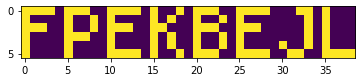

In [4]:
def flip_coords(dots, flips):
    dots = dots.copy()
    for p in flips:
        dots = np.abs(np.abs(p - dots) - p)
    return dots

def make_matrix(dots):
    matrix = np.zeros(np.max(dots, axis=0)+1).T
    matrix[dots[:, 1], dots[:, 0]] = 1
    return matrix

# Do a single flip and count the unique points
# after the transform.
first = flip_coords(dots, flips[:1])
print("solution one:", np.unique(first, axis=0).shape[0])

# flip all the input coordinates 
# for each fold instruction
flipped = flip_coords(dots, flips)

# arange them into a matrix
M = make_matrix(flipped)
plt.imshow(M)

In [6]:
M.shape

(6, 39)